In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])

2022-04-20 17:15:46.491390: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-20 17:15:46.491423: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Load the data
base_path = "../data_files"
version = "8.0.5"

test = pd.read_csv(f'{base_path}/{version}/test.csv', index_col=[0])
X_test, y_test = test.drop(['category', 'Lb_M', 'IsSimulated', 'QSQR'], axis=1), test.category


# Load the model
model = tf.keras.models.load_model('../model_evaluation/models/NN_8.0.5')

2022-04-20 17:16:55.111892: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-20 17:16:55.111932: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-20 17:16:55.111960: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (eprexb.ph.bham.ac.uk): /proc/driver/nvidia/version does not exist
2022-04-20 17:16:55.112233: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


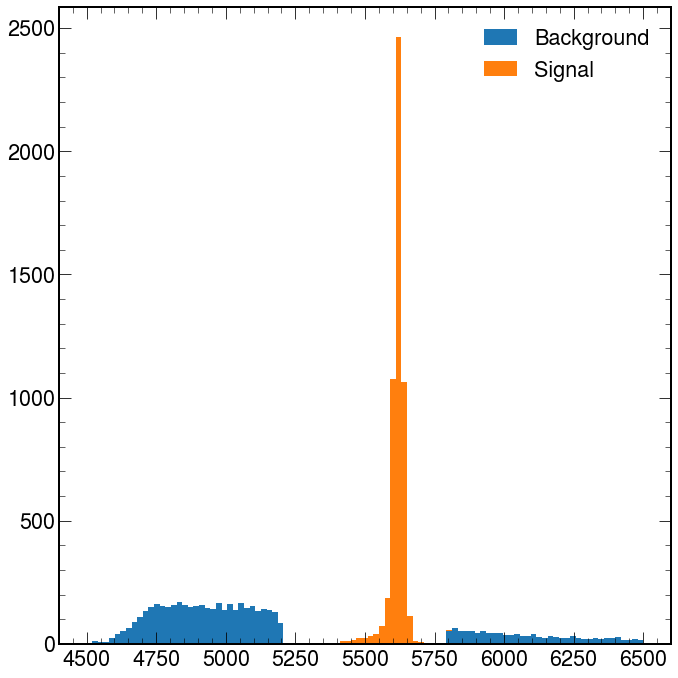

In [13]:
fig, ax = plt.subplots(1, 1)
bins = np.linspace(4500, 6500, 100)
h, _ = np.histogram(test['Lb_M'][test['category']==1], bins=bins)
h1, _ = np.histogram(test['Lb_M'][test['category']==0], bins=bins)
hep.histplot([h1, h], bins=bins, ax=ax, stack=True, histtype='fill', label=['Background', 'Signal'])
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
predictions = model.predict(X_test)
test['Prediction'] = np.squeeze(predictions)
test['PredictedClass'] = np.where(test['Prediction'] > 0.7, 1, 0)

2022-04-20 17:22:25.233496: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


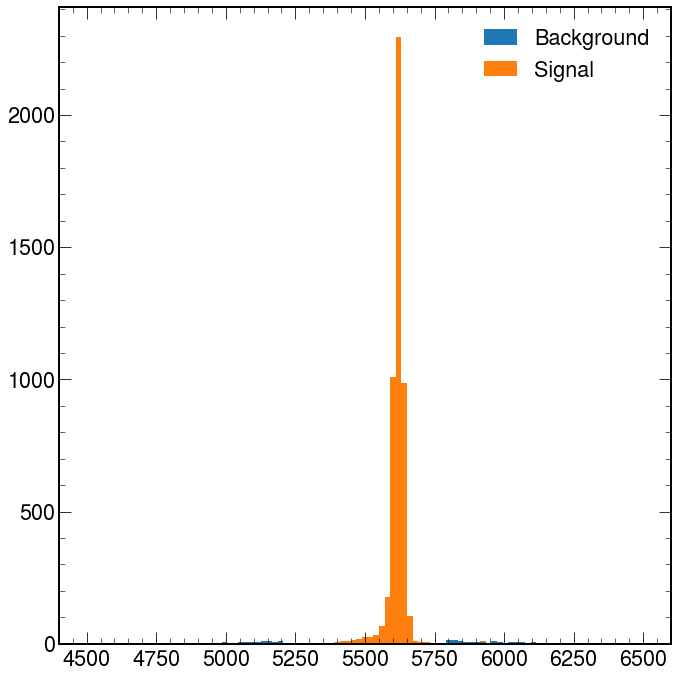

In [15]:
fig, ax = plt.subplots(1, 1)
bins = np.linspace(4500, 6500, 100)
h, _ = np.histogram(test['Lb_M'][np.logical_and(test['category']==1, test['PredictedClass']==1)], bins=bins)
h1, _ = np.histogram(test['Lb_M'][np.logical_and(test['category']==0, test['PredictedClass']==1)], bins=bins)
hep.histplot([h1, h], bins=bins, ax=ax, stack=True, histtype='fill', label=['Background', 'Signal'])
plt.legend()
plt.tight_layout()
plt.show()